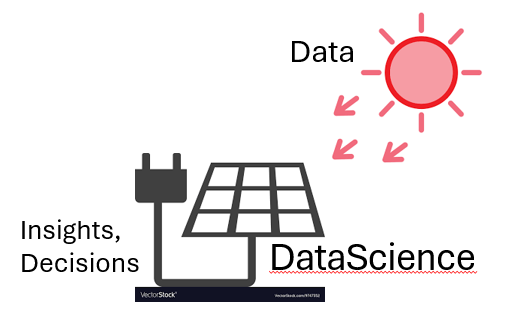

# Outline - Tutorial 0
In this tutorial, we are going to refresh our python foundations and learn how to use Jupyter notebooks. <br>
First "offical" tutorial will be next week.


### Working with Python:
* Run .py files
* Interactive "read-eval-print" loop
    * plain *python* command in cmd/bash (CLI)
    * IPython (CLI+)
    * Jupyter Notebook (GUI)
* How Jupyter works:
    * Python-facing process ("kernel"):
        * Local Server
        * Remote Server
        * Cloud Server, e.g. Google Colab
    * User-facing process (interactive window):
        * Browser (e.g., Chrome)
        * IDE (e.g., Visual Studio Code)

Quickstart options (personal recommendations):
- Install VS code, open notebook, follow instructions 
- open notebook in google colab

**Notebook workflow:**
- All your needs in one place as you work
- Self-contained code + results when you share - **reproducibility**.

Can escape to system console with '!' prefix, but using [magic](https://www.geeksforgeeks.org/useful-ipython-magic-commands/) '%' for basic commands is usually better

In [ ]:
#!ls -ltrh sample_data     # linux
#!dir .                     # windows
%ls    # cross-platform

In [ ]:
# install missing libraries with command-line package manager (pip / conda):
#!pip install numpy matplotlib
# Better, ensure it installs into same environment as the one in which the notebook runs right now..
%pip install numpy matplotlib

In [ ]:
# importing the package library (with its classes and functions under it) into our namespace
import numpy as np

# Python lets you import one/all classes\functions directly into namespace like so:
# from x import y; from z import *  
# Good practice is to try avoid, especially the (*) 
# Tracking where the func/class came from is more important than short code.

# To display the documentation of the library:
np?
# TODO: check how to "collapse" or "make scrollable" the long cell output, on your setup

Inline graphics:

In [ ]:
from numpy import *
from matplotlib.pyplot import *  # from pylab import *


# NOTE: "matlab style" - considered bad practice in python. Never use *, prefer import numpy as np, then np.arange

x = arange(0, 20, 0.3)

figure(figsize=(12, 2))

# plot inline

plot(x, sin(x), "go:", x, cos(x), "bs--")

# also save current fig for outside usage

savefig("my.png")

In [ ]:
# Image exported as figure can be used elsewhere - but also displayed here
from IPython.display import Image, display

display(Image("my.png"))
# Can of course be used to paste any image you want manully;
#  another option is to Ctrl+V directly into a markdown cell (see top cell)

### Python Foundations
* Variables / Types
* Operators
* Functions
* Classes
* Libraries

#### Variables:
**single element**: int, float, etc.

In [ ]:
x = 3
y = 1.0
x, type(x), y, type(y)

In [ ]:
x + y  # implicit casting

**multiple elements**: strings, tuple, list, dictionary:

<u>Note:</u> Python is a 0-index language. l[0] is the first element in a list and not l[1].

In [ ]:
s = "Hello"
s, s[2]

In [ ]:
s1 = "Hello"
s1

In [ ]:
print(f"{s} World")

In [ ]:
print("Hello ' world")

In [ ]:
s

In [ ]:
l = [1, 2, 3, 4]
l

In [ ]:
l[2]

In [ ]:
l = list("hello")
l

In [ ]:
l * 3

In [ ]:
l2 = [s, s + "!", s * 2, "_".join(s)]
l2

In [ ]:
d = dict()
d

In [ ]:
d = {"age": 18, "height": 180}
# (?) Dict is just like list of pairs - true or false?
print(d)
print(list(d.items()))
print(dict(list(d.items())))
# (!) dict: search speed&access, order by keys (though OrderedDict available), mutability

In [ ]:
d["height"] = 181
d

In [ ]:
d["gender"]

In [ ]:
# 'Graceful' handling of errors:
if d.get("gender") is None:
    print("gender info missing")
# 'Default' value:
d.get("gender", "missing")

Mutable vs  Immutable:

In [ ]:
l

In [ ]:
l[3] = "123"
l

In [ ]:
t = (1, 2, 3)
t

In [ ]:
t[1] = -12

Indexing

In [ ]:
a = list(range(100)[80:15:-20])  # start, stop, step
a, a[::-1]

In [ ]:
b = [[1, 2, 3, 4, 5], [10, 20, 30, 40, 50]]
b[1][1:3]
# b[1:3][1] # ?

#### Loops

In [ ]:
for i in range(3):
    print(i)

print()

j = 0
while j < 10:
    print(j)
    j += 2

#### Comprehensions
List comprehension & dict comprehension

In [ ]:
print([x**2 for x in range(0, 5)])

In [ ]:
# Find squares with last digit of 4),
print({x: x**2 for x in range(0, 100, 2) if x**2 % 10 == 4})

In [ ]:
b = [[1, 2, 3, 4, 5], [10, 20, 30, 40, 50], [0] * 5]
print(b[1][1:3])
# b[1:3][1] # ?
[br[1] for br in b[1:3]]

#### Functions
* functions declaration
* **scope:** global vs local variables vs arguments


In [ ]:
# function
c = 1

def func1():
    c = 2
    return "Hello from a function " * c

func1()

In [ ]:
c

In [ ]:
# defaults, passing by position/name
a, b = 2, 3

def func2(a, b, c=2):
    return a * b * c


func2(a, b), func2(a, b, 3), func2(a, c=3, b=b)

In [ ]:
# variable length args list


def func3(*argv):
    """
    argv is a list.
    By the way - this is how you write multi-line comments...
    """
    output = 0.1

    for arg in argv:
        print("got arg: ", arg)
        output += arg

    return output


# try to add more inputs
func3(1, 30, 1e3)

In [ ]:
1e3, inf, nan

In [ ]:
# unnamed args list & named args dict (keyword args = kwargs)


def func4(*args, **kwargs):
    print("func4 running")
    print(type(args), type(kwargs))
    print("args: ", args)
    print("kwargs: ", kwargs)
    a = kwargs["a"]
    b, c = kwargs["b"], kwargs["c"]
    print("a,b,c: ", a, b, c)

    return a * b * c


func4(3, 4, a=1, b=3, c=1e3, d="what is d?", e="last name")

In [ ]:
# forwarding (e.g., plot()-->line())


def func5(x, y, **kwargs):
    print("func5 running")
    print("x, y: ", x, y)
    func4(**kwargs)


func5(3, 5, a=3, b=4, c=8) # (?) why no return value from func4?
print("---")
func5(3, 5, **{"a": 3, "b": 4, "c": 8})

In [ ]:
"""Towards good reusable functions (SW engineering good practice):
good names, documentation, input checks, exceptions managing, etc etc

NOTE: in Data Science, we're tempted to move fast ("exploration mode") and neglect good code in contrast to Software Engineering;
but in fact we should actually give extra care !!!  as in Data Science code-bugs / data-bugs / algo-bugs can games with one another.
"""


def calc_payment(price: float, amount: float, discount_perc: float = 0) -> float:
    """
    Calculate the payment for buying an item.
    :param price: Price of the item
    :param amount: Amount of items
    :param discount_perc: Discount percentage
    :return: Payment amount
    """
    # NOTE: types declaration is not self-enforcing but good for doc. We should test explicitly:
    assert all([type(x) in [int, float] for x in (price, amount, discount_perc)])
    # TODO why type test comes first? TODO how the line works? (analyze comprehension)
    assert discount_perc >= 0 and discount_perc <= 100, "invalid discount percent"

    if discount_perc == 100:
        raise (ValueError("No revenue!"))

    return price * amount * (1 - discount_perc / 100)

In [ ]:
# Documentation helps users to get info, just as with library functions.
calc_payment?

In [ ]:
# TODO go through all options, understand behavior
try:
    display(calc_payment(4, 5))
    display(calc_payment(4, 5, 20))
    display(calc_payment(4, 5, 100))
    # display( calc_payment(4, 5, 200) )
    # display( calc_payment(4, 5, "56") )

except ValueError as e:
    print(e)
    giveaway_day = True
    if giveaway_day:
        print("we give it away, yay!")
        pass
    else:
        raise (e)

#### Classes

In [ ]:
# new object called Student
class Student:
    def __init__(self, name, id=""):
        self.name = name
        self.id = id

    def get_name(self):
        return self.name

    def set_name(self, name):
        self.name = name

    def get_summary(self):
        return self.name.upper() + ", ID=" + self.id


# declare a Student object
student = Student("yossi", "123")
student, student.get_summary()

In [ ]:
# another new Student object
student2 = Student("yossi2")
student2, student2.name, student2.get_name()

In [ ]:
# another Student object pointing to the same student
student3 = student
student3.get_summary()

In [ ]:
student.set_name("yarin")
student.get_name()

In [ ]:
student3.get_name()

In [ ]:
# If we really want to duplicate, can use copy:
import copy

student4 = copy.copy(student3)
# verify content is not shared now.
student4.set_name("yossi")
student4.get_name(), student3.get_name()

In [ ]:
class StudentData:
    def __init__(self, age=20, department="Engineering", program="B.Sc."):
        self.age = age
        self.program = program
        self.department = department


class StudentData1:
    """Equivalent to StudentData - TODO verify"""

    age = 20
    department = "Engineering"
    program = "B.Sc."


student = StudentData1()  # can't pass init modifications to constructor now..
student.age = 25

```
? Is a data object more like list or tuple? (remember mutability)
? What's better to pass into function to avoid surprising *side effects*? mutable or immutable?
? What bugs are more frequent and/or tricky in Python than in other languages?
```

##### OOP (object-oriented programming) in 1 minute:

In [ ]:
"""
Functions: new code calls olds code
Classes: + old code calls new code ("polymorphism")
           --> layered SW, APIs, frameworks, .. SW engineering.
"""


class UniTeacher:
    employed = True

    def terminate(self):
        self.employed = False
        print("terminated, ")


class Assistant(UniTeacher):
    pass
    # def terminate(self):  # override!
    #    super().terminate()


class Professor(UniTeacher):
    tenure = True

    def terminate(self):  # override!
        if self.tenure:
            print("tenured, cant terminate")
        else:
            super.terminate()


staff = [Assistant(), Professor()]
for person in staff:
    person.terminate()

# TODO make all employees have names that are printed on termination

#### Iterators (BONUS)

Under the hood of "for-loop"  (BONUS, but good example of OOP)

In [ ]:
ll = [1, 2, 3, 4]

ll_iter = iter(ll)  # same as ll.__iter__()
try:
    while True:
        # print(ll.__iter__().__next__())  # TODO try. What happens? Why? what to do in notebook?
        print(ll_iter.__next__())  # same as next(ll_iter)
except StopIteration as e:
    pass
    # raise(e)

# (!) the for-loop construct can be used with any object <obj> supporting this API:
#     (a) obj.__iter__() creates iterator <it1> which can do:
#     (b) <it1>.__next__(), emitting elements till :
#     (c) no more elements, signalled by raising StopIteration exception

Some common iterator manipulations:

In [ ]:
d = {"a": "A", "b": "B"}
for k, v in d.items():
    print(k, v)

In [ ]:
# enumerate(it1):  yield (running-index, value) pairs (2-tuples) ; value is what it1 yields

for ii, (k, v) in enumerate(d.items()):
    print(ii, k, v)

In [ ]:
# zip(it1, it2):  yield (val1, val2) pairs ; where val1/2 are yielded by it1/2 respectively
for ii, (k, v) in zip(range(len(d)), d.items()):
    print(ii, k, v)